# Load and plot RMSEs of different methods 

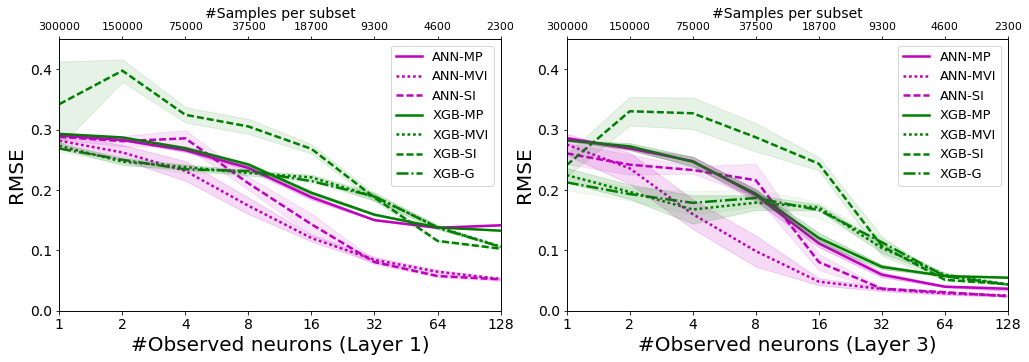

In [8]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = 'figures/diffMethods_RMSEs'
# fig, ax1 = pl.subplots(2,1, figsize=(10.4, 11), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .35, wspace=.1)
fig, ax1 = pl.subplots(1,2, figsize=(17, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .35, wspace=.15)
ax1 = ax1.ravel()

networks = ['NN']
layers = [0,2]
nRecordings = 10
methods = ['NN','XGB']
methodLabels = ['ANN','XGB','LR']
imputes = [['MP','MVI','SI'],['MP','MVI','SI',''],['MP']]
imputeLabels = [['MP','MVI','SI'],['MP','MVI','SI','G'],['MP']]
lstyles = ['-', ':', '--', '-.']
colors = ['m', 'g', 'c', 'r', 'b', 'k', 'y']

for iLS in range(len(layers)):
    iLayer = layers[iLS]
    x = [2**x for x in range(8)]
    x = range(len(x))
    ax1[iLS].set_xlim([0, len(x)-1])
    ax2 = ax1[iLS].twiny()
    for iMethod in range(len(methods)):
        for iImpute in range(len(imputes[iMethod])):
            #NNMP_RMSES_Layer2nRec10NN.dat
            fName = 'results/new/' + methods[iMethod] + imputes[iMethod][iImpute] + '_RMSES_Layer' \
                    + str(iLayer) + 'nRec' + str(nRecordings) + 'NN.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            #y = np.reshape(y,(8))
            error = np.std(np.mean(rmses, axis=1), axis=0)
            #error = np.reshape(error,(8))
            ax1[iLS].plot(x, y, label=methodLabels[iMethod]+'-'+ imputeLabels[iMethod][iImpute], 
                          linewidth=2.5, color=colors[iMethod], linestyle=lstyles[iImpute])
            pl.fill_between(x, y-error, y+error, alpha=0.2-0.05*iImpute, color=colors[iMethod])


    legend = ax1[iLS].legend(loc='upper right', ncol=1, shadow=False, fontsize=13)
    #legend = ax1[iLS].legend(loc='upper right', shadow=False, fontsize=13, bbox_to_anchor=(1.2, 1))
    ax1[iLS].set_xlabel('#Observed neurons (Layer '+str(iLayer+1)+')', fontsize=20)
    ax2.set_xlabel('#Samples per subset', fontsize=14)


    ax2.set_xlim(ax1[iLS].get_xlim())
    ax1[iLS].set_xticklabels( [2**x for x in range(8)], fontsize=14)
    nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(8)])*100

    ax2.set_xticklabels(nSamples, fontsize=11)
    ax1[iLS].set_ylabel('RMSE', fontsize=20)
    ax1[iLS].set_ylim([0, .45])
    ax1[iLS].set_yticks(np.arange(0,.45,.1))
    ax1[iLS].set_yticklabels(np.arange(0,.45,.1), fontsize=14)

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)

# Plot RMSEs of NN and DNN

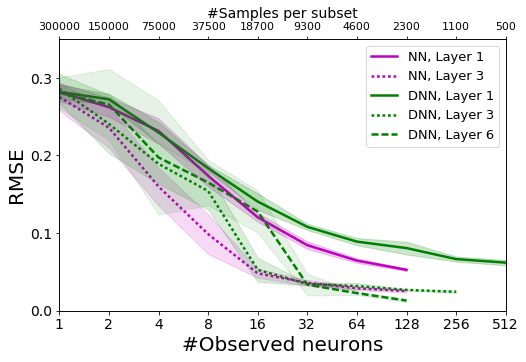

In [9]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/NNMVI_RMSEs_NN_vs_DNN'
fig, ax1 = pl.subplots(1,1, figsize=(8, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .35, wspace=.15)

x = [2**x for x in range(10)]
x = range(len(x))
ax1.set_xlim([0, len(x)-1])
ax2 = ax1.twiny()

networks =['NN','DNN']
layers = [[0,2],[0,2,5]]
nRecordings =10
methods =['']
#methodLabels =['XGB-G', 'XGB-MP']
lstyles = ['-', ':', '--', '-.']
colors = ['m', 'g', 'c', 'r', 'b', 'k', 'y']

for iMethod in range(len(methods)):
    for iNetwork in range(len(networks)):
        ls = layers[iNetwork]
        for iLayer in range(0,len(ls)):
            #NNMVI_RMSES_Layer2_nRec10_NN.dat
            fName = 'results/NNMVI_RMSES_Layer' + str(ls[iLayer]) + '_nRec10_' + networks[iNetwork] + '.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            error = np.std(np.mean(rmses, axis=1), axis=0)
            ax1.plot(x[0:rmses.shape[2]], y, label=networks[iNetwork]+', Layer '+ str(ls[iLayer]+1), 
                     color=colors[iNetwork],linestyle=lstyles[iLayer],linewidth=2.5)
            pl.fill_between(x[0:rmses.shape[2]], y-error, y+error, alpha=0.2-0.05*iLayer, color=colors[iNetwork])


legend = ax1.legend(loc='upper right', shadow=False, fontsize=13)
ax1.set_xlabel('#Observed neurons', fontsize=20)
ax2.set_xlabel('#Samples per subset', fontsize=14)

ax2.set_xlim(ax1.get_xlim())
ax1.set_xticklabels( [2**x for x in range(10)], fontsize=14)
nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(10)])*100

ax2.set_xticklabels(nSamples, fontsize=11)
ax1.set_ylabel('RMSE', fontsize=20)
ax1.set_ylim([0, .35])
ax1.set_yticks(np.arange(0,.35,.1))
ax1.set_yticklabels(np.arange(0,.35,.1), fontsize=14)

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)


# Plot RMSEs for different # Rec of NN and DNN

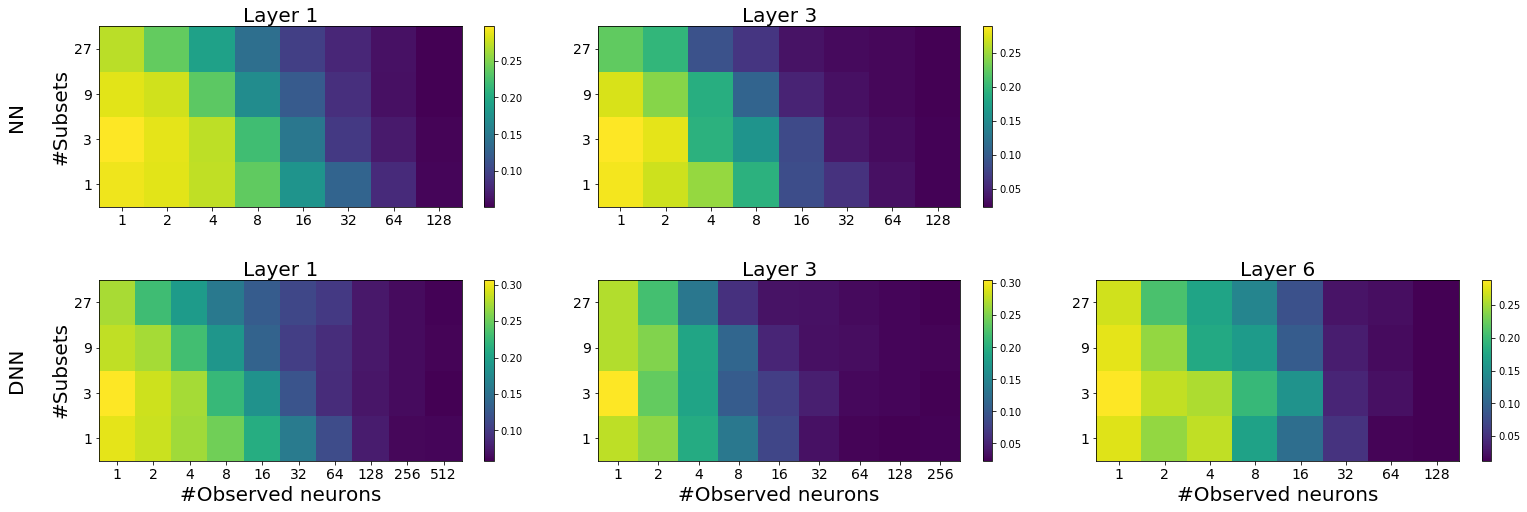

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/diffRec_NNMVI_RMSEs_NN_vs_DNN'

networks =['NN','DNN']
layers = [[0,2],[0,2,5]]
recordings = [3**i for i in range(4)]
nRecordings = len(recordings)
nSubnetSize = [8,8,0,10,9,8]
lstyles =['-',  '--', ':']
colors =['k', 'b', 'r', 'g', 'm', 'c']

fig, ax = plt.subplots(2,3, figsize=(26, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.1)

ax = ax.ravel()

i = 0
for iNetwork in range(len(networks)):
    ls = layers[iNetwork]
    for iLayer in range(0,len(ls)):
        #NNMVI_RMSES_Layer2_multiRec_NN.dat
        fName = 'results/' + 'NNMVI_RMSES_Layer' + str(ls[iLayer]) + '_multiRec_' + networks[iNetwork] + '.dat'
        with open(fName,'rb') as f:
            rmses = pickle.load(f)
        f.close()
                        
        RMSE = np.transpose(np.mean(np.mean(rmses, axis=1), axis=0))
        cax = ax[i].pcolor(RMSE)
        #fig.colorbar(cax)
        fig.colorbar(cax, ax=ax[i])
        ax[i].set_xticks(np.arange(0.5,nSubnetSize[i]+0.5))
        subnetSize = [2**j for j in range(nSubnetSize[i])]
        ax[i].set_xticklabels(subnetSize, fontsize=14)
        ax[i].set_yticks(np.arange(0.5,nRecordings+0.5))
        ax[i].set_yticklabels(recordings, fontsize=14)
        ax[i].set_title('Layer ' + str(ls[iLayer]+1), fontsize=20)

        if i>2:
            ax[i].set_xlabel('#Observed neurons', fontsize=20)
            
        if i==0:
            ax[i].set_ylabel('NN\n\n#Subsets', fontsize=20)
            
        if i==3:
            ax[i].set_ylabel('DNN\n\n#Subsets', fontsize=20)
        
        i += 1
        if i==2:
            fig.delaxes(ax[i])
            i += 1

        
plt.draw()
plt.savefig(figName +'.pdf', format='pdf')
plt.savefig(figName +'.eps', format='eps', dpi=1000)


# Plot RMSEs for different noise level

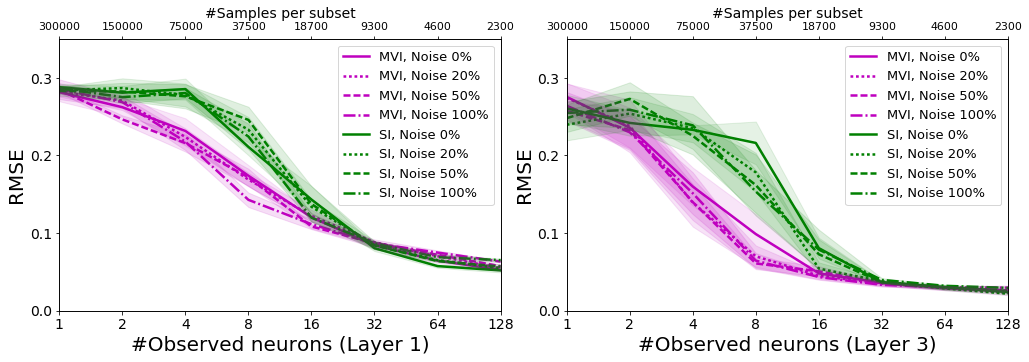

In [11]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = 'figures/Noise_RMSEs_2'
fig, ax1 = pl.subplots(1,2, figsize=(17, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .35, wspace=.15)
ax1 = ax1.ravel()

networks = ['NN']
layers = [0,2]
nRecordings = 10
noises = ['','_Noise20','_Noise50','_Noise100']
noiseLabels = ['Noise 0%','Noise 20%','Noise 50%', 'Noise 100%']
imputes = ['MVI','SI']
imputeLabels = ['MVI','SI']
lstyles = ['-', ':', '--', '-.']
colors = ['m', 'g', 'c', 'r', 'b', 'k', 'y']

for iLS in range(len(layers)):
    iLayer = layers[iLS]
    x = [2**x for x in range(8)]
    x = range(len(x))
    ax1[iLS].set_xlim([0, len(x)-1])
    ax2 = ax1[iLS].twiny()
    for iImpute in range(len(imputes)):
        for iNoise in range(len(noises)):
            #NNMVI_RMSES_Layer2_nRec10_NN_noise20.dat
            fName = 'results/NN' + imputes[iImpute] + '_RMSES_Layer' + str(iLayer) + '_nRec' \
                    + str(nRecordings) + '_NN' + noises[iNoise] + '.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            #y = np.reshape(y,(8))
            error = np.std(np.mean(rmses, axis=1), axis=0)
            #error = np.reshape(error,(8))
            ax1[iLS].plot(x, y, label=imputeLabels[iImpute]+', '+ noiseLabels[iNoise], 
                          linewidth=2.5, color=colors[iImpute], linestyle=lstyles[iNoise])
            pl.fill_between(x, y-error, y+error, alpha=0.1+0.01*iNoise, color=colors[iImpute])


    legend = ax1[iLS].legend(loc='upper right', shadow=False, fontsize=13)
    ax1[iLS].set_xlabel('#Observed neurons (Layer '+str(iLayer+1)+')', fontsize=20)
    ax2.set_xlabel('#Samples per subset', fontsize=14)


    ax2.set_xlim(ax1[iLS].get_xlim())
    ax1[iLS].set_xticklabels( [2**x for x in range(8)], fontsize=14)
    nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(8)])*100

    ax2.set_xticklabels(nSamples, fontsize=11)
    ax1[iLS].set_ylabel('RMSE', fontsize=20)
    ax1[iLS].set_ylim([0, .35])
    ax1[iLS].set_yticks(np.arange(0,.35,.1))
    ax1[iLS].set_yticklabels(np.arange(0,.35,.1), fontsize=14)

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)

# plot DNN vs NN, 2 graphs

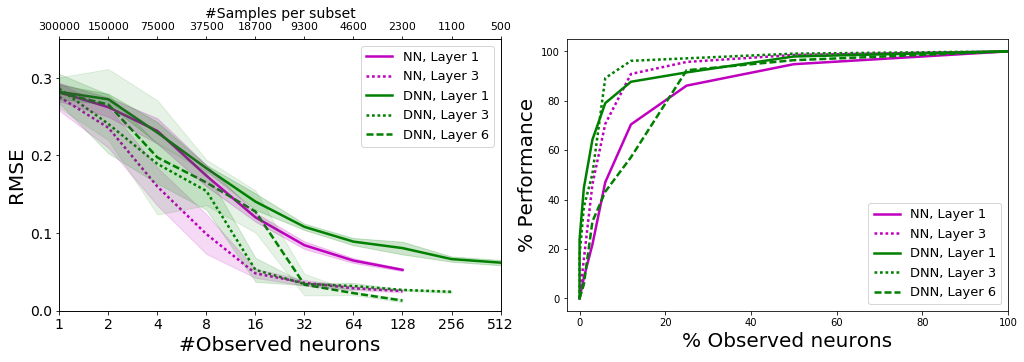

In [12]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/NNMVI_RMSEs_NN_vs_DNN_2'
fig, ax1 = pl.subplots(1,2, figsize=(17, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .35, wspace=.15)
ax1 = ax1.ravel()

xx = [2**x for x in range(10)]
x = range(len(xx))
ax1[0].set_xlim([0, len(x)-1])
ax2 = ax1[0].twiny()

networks =['NN','DNN']
layers = [[0,2],[0,2,5]]
nRecordings =10
methods =['']
#methodLabels =['XGB-G', 'XGB-MP']
lstyles = ['-', ':', '--', '-.']
colors = ['m', 'g', 'c', 'r', 'b', 'k', 'y']

for iMethod in range(len(methods)):
    for iNetwork in range(len(networks)):
        ls = layers[iNetwork]
        for iLayer in range(0,len(ls)):
            #NNMVI_RMSES_Layer2_nRec10_NN.dat
            fName = 'results/NNMVI_RMSES_Layer' + str(ls[iLayer]) + '_nRec10_' + networks[iNetwork] + '.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            error = np.std(np.mean(rmses, axis=1), axis=0)
            ax1[0].plot(x[0:rmses.shape[2]], y, label=networks[iNetwork]+', Layer '+ str(ls[iLayer]+1), 
                     color=colors[iNetwork], linestyle=lstyles[iLayer], linewidth=2.5)
            pl.fill_between(x[0:rmses.shape[2]], y-error, y+error, alpha=0.2-0.05*iLayer, color=colors[iNetwork])
            
            yy = np.mean(np.mean(rmses, axis=1), axis=0)
            lastInd = yy.shape[0]-1
            yDiff = yy-yy[lastInd]
            yMax = yDiff[0]
            ynew =(yMax -yDiff)/yMax*100
            myInt = xx[rmses.shape[2]-1]
            myList =xx[0:rmses.shape[2]]
            xnew = [i*100 / myInt for i in myList]
            ax1[1].plot(xnew, ynew, label=networks[iNetwork]+', Layer '+ str(ls[iLayer]+1), 
                     color=colors[iNetwork], linestyle=lstyles[iLayer], linewidth=2.5)

legend = ax1[0].legend(loc='upper right', shadow=False, fontsize=13)
ax1[0].set_xlabel('#Observed neurons', fontsize=20)
ax2.set_xlabel('#Samples per subset', fontsize=14)

ax2.set_xlim(ax1[0].get_xlim())
ax1[0].set_xticklabels( [2**x for x in range(10)], fontsize=14)
nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(10)])*100

ax2.set_xticklabels(nSamples, fontsize=11)
ax1[0].set_ylabel('RMSE', fontsize=20)
ax1[0].set_ylim([0, .35])
ax1[0].set_yticks(np.arange(0,.35,.1))
ax1[0].set_yticklabels(np.arange(0,.35,.1), fontsize=14)

legend = ax1[1].legend(loc='lower right', shadow=False, fontsize=13)
ax1[1].set_xlabel('% Observed neurons', fontsize=20)
ax1[1].set_ylabel('% Performance', fontsize=20)
ax1[1].set_xlim([-3,100])

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)

# plot diff PR with noise

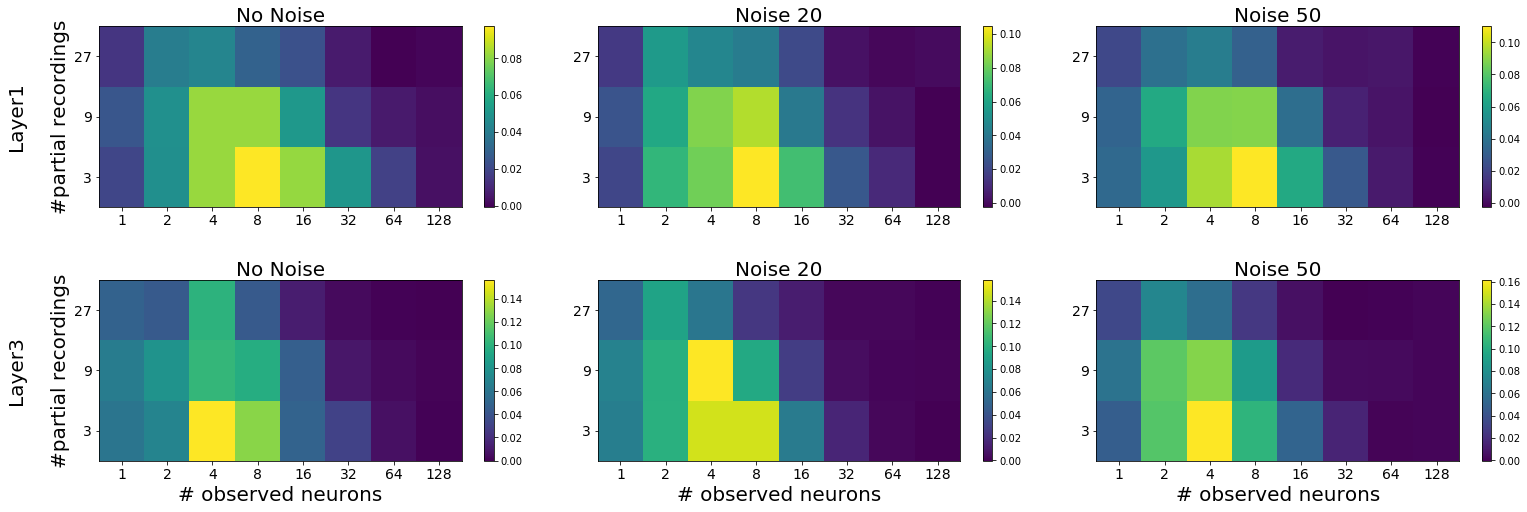

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/diffRec_NNMVI_RMSEs_NN_vs_DNN'

networks =['NN']
noises = ['','_Noise0.2', '_Noise0.5']
noiseLabel = ['No Noise','Noise 20','Noise 50','Noise 100']
recordings = [3**i for i in range(4)]
nRecordings = len(recordings)
layers = [0,2]
nSubnetSize = 8
lstyles =['-',  '--', ':']
colors =['k', 'b', 'r', 'g', 'm', 'c']

fig, ax = plt.subplots(2,3, figsize=(26, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.1)

ax = ax.ravel()

i = 0
for iLayer in layers:
    for iNoise in range(len(noises)):
        #NNMVI_RMSES_Layer0_multiRec_NN_Noise0.2.dat
        fName = 'results/' + 'NNMVI_RMSES_Layer' + str(iLayer) + '_multiRec_NN' + noises[iNoise] + '.dat'
        with open(fName,'rb') as f:
            rmses = pickle.load(f)
        f.close()
                        
        RMSE = np.transpose(np.mean(np.mean(rmses, axis=1), axis=0))
        diffRMSE = (RMSE - RMSE[-1])[:-1]
        cax = ax[i].pcolor(diffRMSE)
        #fig.colorbar(cax)
        fig.colorbar(cax, ax=ax[i])
        ax[i].set_xticks(np.arange(0.5,nSubnetSize+0.5))
        subnetSize = [2**j for j in range(nSubnetSize)]
        ax[i].set_xticklabels(subnetSize, fontsize=14)
        ax[i].set_yticks(np.arange(0.5,nRecordings-0.5))
        ax[i].set_yticklabels(recordings[1:], fontsize=14)
        ax[i].set_title(str(noiseLabel[iNoise]), fontsize=20)

        if i>2:
            ax[i].set_xlabel('#Observed neurons', fontsize=20)
            
        if i==0:
            ax[i].set_ylabel('Layer1\n\n#partial recordings', fontsize=20)
            
        if i==3:
            ax[i].set_ylabel('Layer3\n\n#partial recordings', fontsize=20)
        
        i += 1


        
plt.draw()
plt.savefig(figName +'.pdf', format='pdf')
plt.savefig(figName +'.eps', format='eps', dpi=1000)


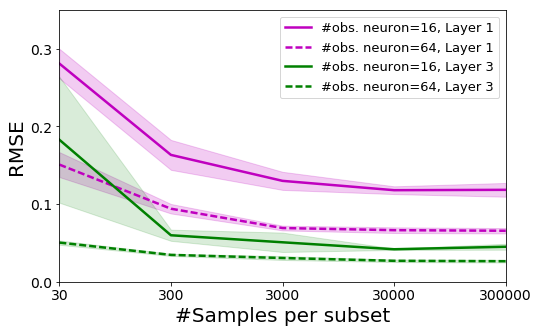

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/diffSampleSize_NNMVI_RMSE_2'

networks =['NN']
layers = [[0,2],[0,2,5]]
# how many samples?
samples = [3*(10**i) for i in range(1,6)]
# How many observation (subset size)
subnetSize = [4**i for i in range(1,4)]
nRecordings = 10
nSubnetSize = [8,8,0,10,9,8]
lstyles =['-',  '--', ':']
colors = ['m', 'g', 'c', 'r', 'b', 'k', 'y']


fig, ax1 = plt.subplots(1,1, figsize=(8, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.1)
# ax = ax.ravel()

i = 0
for iNetwork in range(len(networks)):
    ls = layers[iNetwork]
    for iLayer in range(0,len(ls)):
        #NNMVI_RMSES_Layer0_diffSampleSize_NN.dat
        fName = 'results/' + 'NNMVI_RMSES_Layer' + str(ls[iLayer]) + '_diffSampleSize_' + networks[iNetwork] + '.dat'
        with open(fName,'rb') as f:
            rmses = pickle.load(f)
        f.close()
                        
        RMSE = np.transpose(np.mean(np.mean(rmses, axis=1), axis=0))
        errors = np.transpose(np.std(np.mean(rmses, axis=1), axis=0))
        for j in range(1,RMSE.shape[0]):
            rmses = RMSE[j,:]
            error = errors[j,:]
            ax1.plot(range(len(samples)), rmses, label='#obs. neuron='+str(subnetSize[j])+', Layer '+ str(ls[iLayer]+1), 
                     color=colors[iLayer], linestyle=lstyles[j-1], linewidth=2.5)
            plt.fill_between(range(len(samples)), rmses-error, rmses+error, alpha=0.2-0.05*iLayer, color=colors[iLayer])

legend = ax1.legend(loc='upper right', shadow=False, fontsize=13, ncol=1)
ax1.set_xlabel('#Samples per subset', fontsize=20)
ax1.set_xlim([0, len(samples)-1])
ax1.set_xticks(range(len(samples)))
ax1.set_xticklabels(samples, fontsize=14)
ax1.set_ylabel('RMSE', fontsize=20)
ax1.set_ylim([0, .35])
ax1.set_yticks(np.arange(0,.35,.1))
ax1.set_yticklabels(np.arange(0,.35,.1), fontsize=14)
            
            
            
plt.draw()
plt.savefig(figName +'.pdf', format='pdf')
plt.savefig(figName +'.eps', format='eps', dpi=1000)


# plot Spiking data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [2**x for x in range(10)]
x = range(len(x))
y = np.mean(np.mean(rmses, axis=1), axis=0)
error = np.std(np.mean(rmses, axis=1), axis=0)

figName = '../partial_recordings/figures/XGBMVI_RMSEs_Spiking'
fig, ax1 = plt.subplots(1,1, figsize=(8, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .35, wspace=.15)
ax1.plot(x[0:rmses.shape[2]], y, linewidth=2.5, color='m')
plt.fill_between(x[0:rmses.shape[2]], y-error, y+error, alpha=0.2, color='m')

ax1.set_xlabel('# observed neurons', fontsize=20)
ax1.set_xlim([0,7])
ax1.set_xticklabels( [2**x for x in range(8)], fontsize=14)
ax1.set_ylabel('RMSE', fontsize=20)
ylim = ax1.get_ylim()
ax1.set_ylim(ylim)
ax1.tick_params('both', labelsize=14)

plt.draw()
plt.savefig(figName +'.pdf', format='pdf')
plt.savefig(figName +'.eps', format='eps', dpi=1000)